In [36]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler
import warnings

In [38]:
warnings.filterwarnings('ignore')
# Chargement du dataset
data = pd.read_csv('C:/Users/hp/Desktop/datasets/diabetes_dataset.csv')
# un Aperçu des données
print("Aperçu des premières lignes :")
print(data.head())

Aperçu des premières lignes :
   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0           0   58  Female     White  35.8                 83.4   
1           1   48    Male     Asian  24.1                 71.4   
2           2   34  Female     Black  25.0                113.8   
3           3   62    Male     Asian  32.7                100.4   
4           4   27  Female     Asian  33.5                110.8   

   Fasting_Blood_Glucose  HbA1c  Blood_Pressure_Systolic  \
0                  123.9   10.9                      152   
1                  183.7   12.8                      103   
2                  142.0   14.5                      179   
3                  167.4    8.8                      176   
4                  146.4    7.1                      122   

   Blood_Pressure_Diastolic  ...  Cholesterol_HDL  Cholesterol_LDL   GGT  \
0                       114  ...             50.2             99.2  37.5   
1                        91  ...             62.0     

In [3]:
# la Taille du dataset
print("\nDimensions du dataset :", data.shape)
#parcourir la dataset
data.info()
print(data.describe(include="all"))
print(data.isnull().sum())
print("le nombre de duplication:",data.duplicated().sum())
print(data['Sex'].unique())  # Afficher les valeurs uniques de sex


Dimensions du dataset : (10000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholestero

In [40]:
females= data[data['Sex'] == 'Female']
print(females.iloc[109])#affichage d'une ligne
print("Aperçu des premières lignes :")
print(females.head())

Unnamed: 0                            234
Age                                    57
Sex                                Female
Ethnicity                           Asian
BMI                                  32.0
Waist_Circumference                 114.5
Fasting_Blood_Glucose                82.5
HbA1c                                 4.4
Blood_Pressure_Systolic               108
Blood_Pressure_Diastolic               87
Cholesterol_Total                   241.2
Cholesterol_HDL                      34.7
Cholesterol_LDL                     113.3
GGT                                  71.5
Serum_Urate                           4.3
Physical_Activity_Level          Moderate
Dietary_Intake_Calories              1520
Alcohol_Consumption                 Heavy
Smoking_Status                     Former
Family_History_of_Diabetes              1
Previous_Gestational_Diabetes           1
Name: 234, dtype: object
Aperçu des premières lignes :
   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference

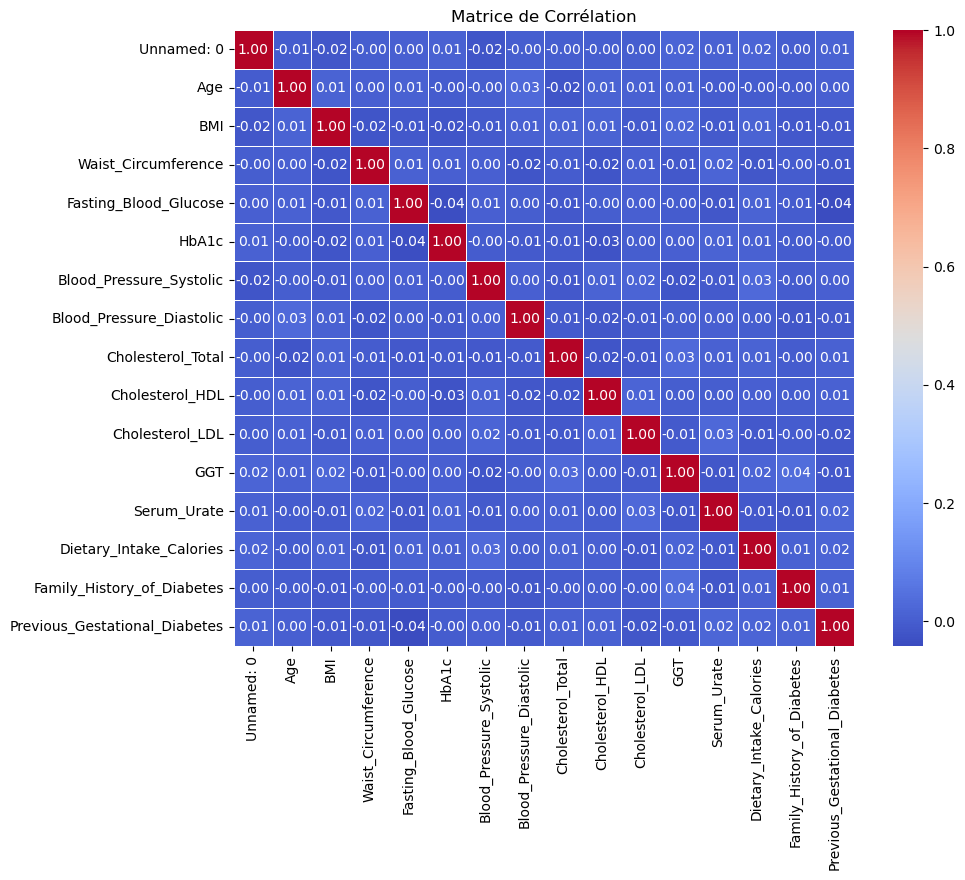

In [42]:
#matrice de correlation 
numeric =females.select_dtypes(include=['number'])
corr_matrix =numeric.corr()
plt.figure(figsize=(10, 8))  # Ajustez la taille de l'image selon vos besoins
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

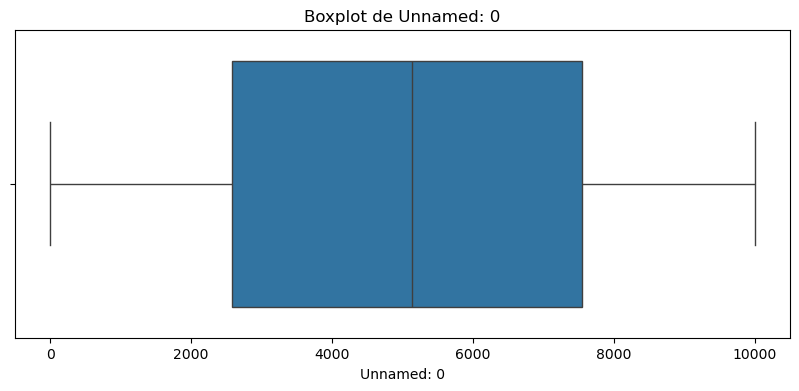

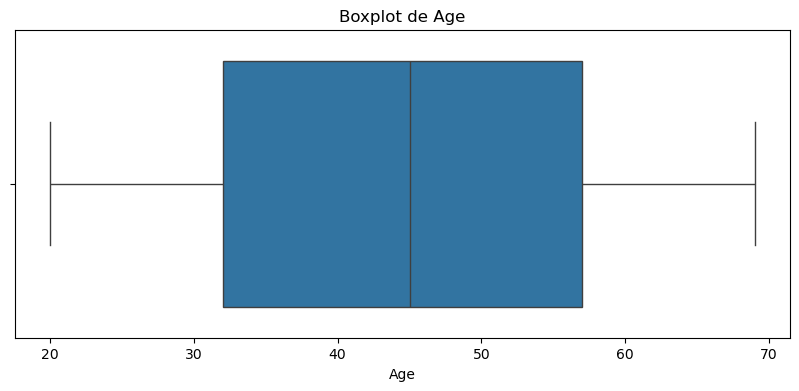

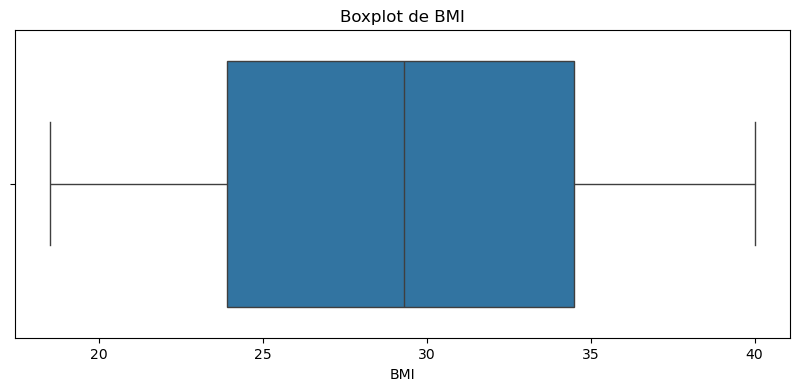

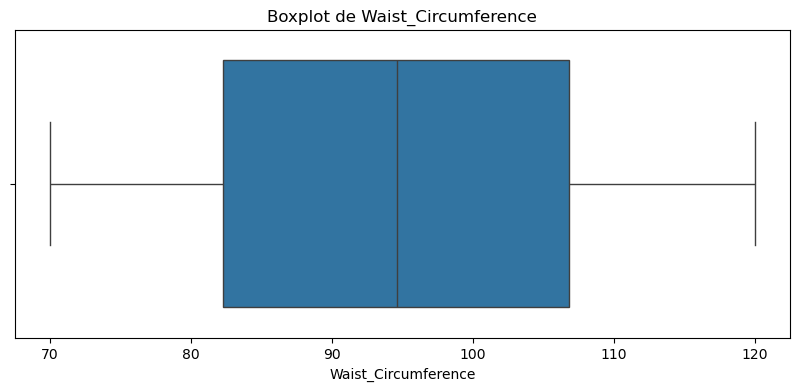

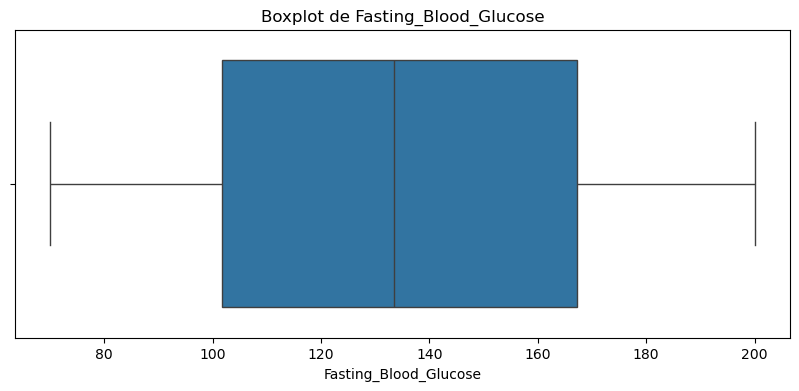

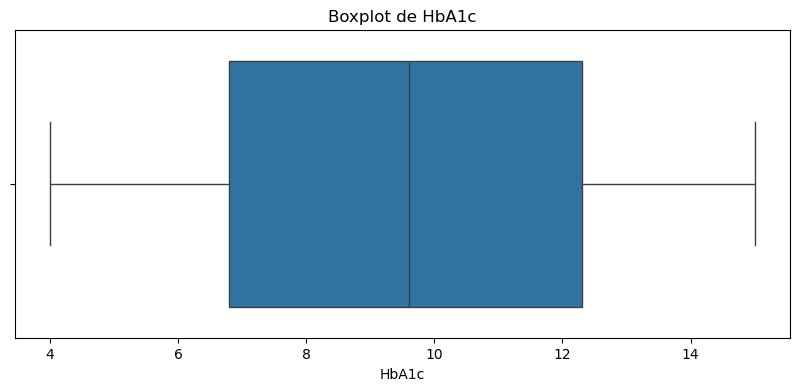

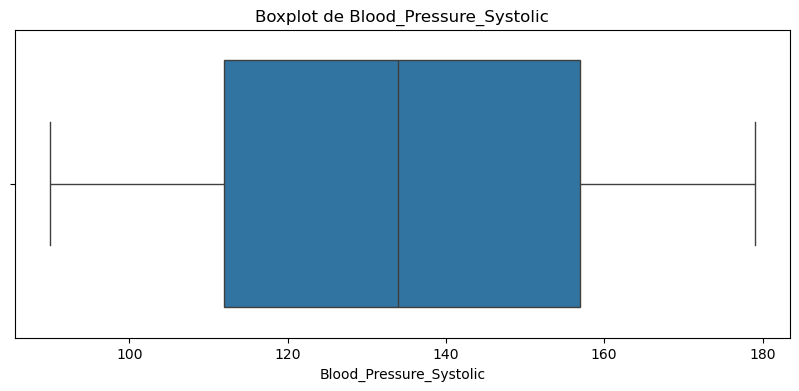

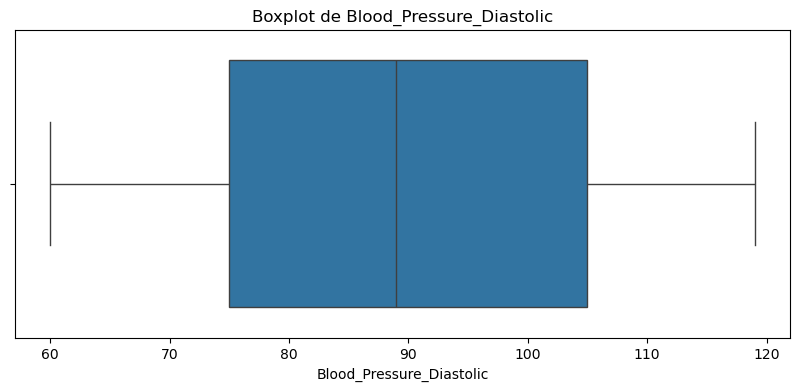

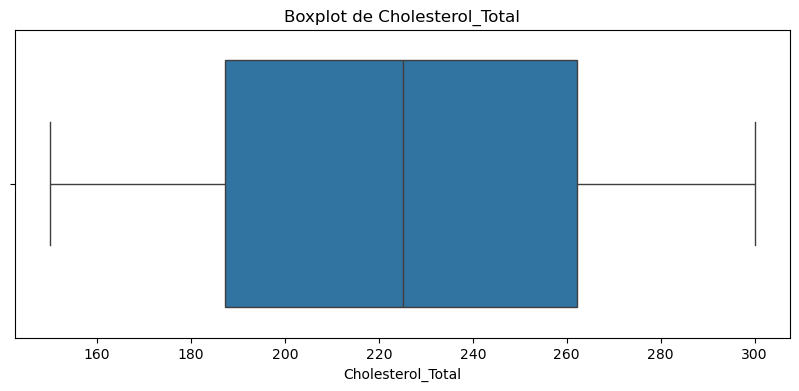

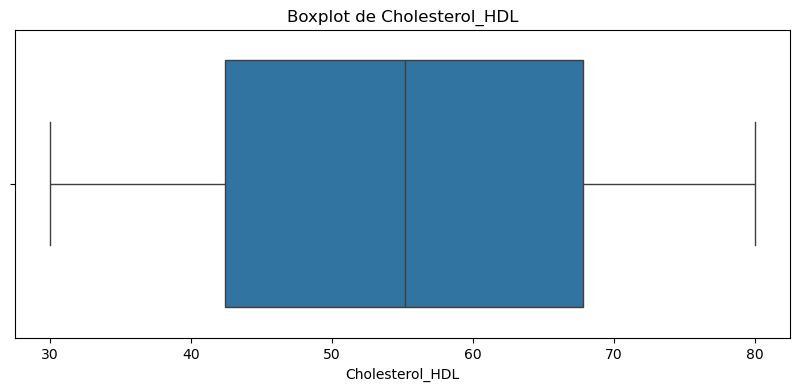

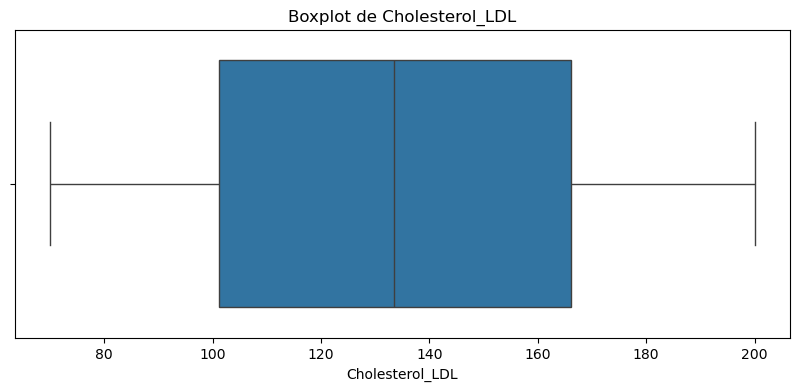

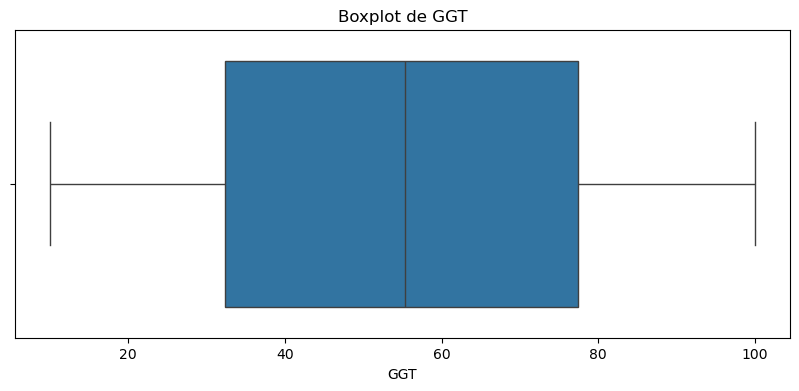

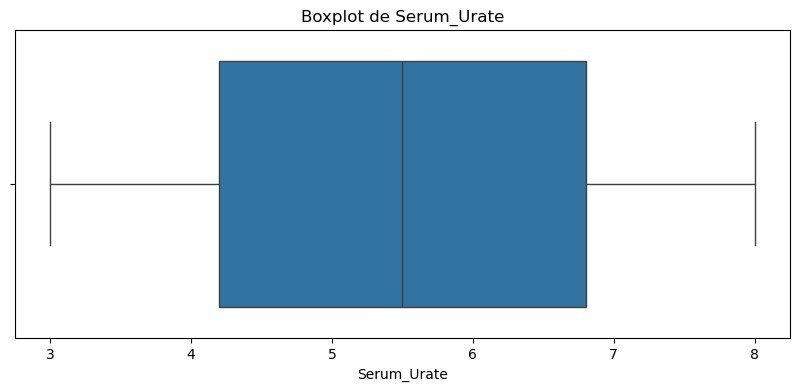

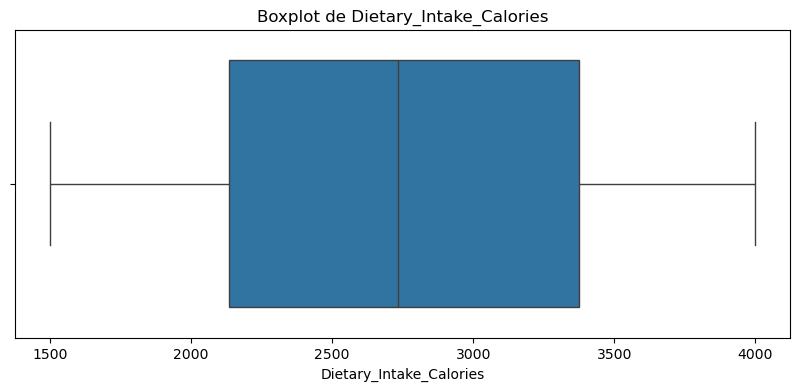

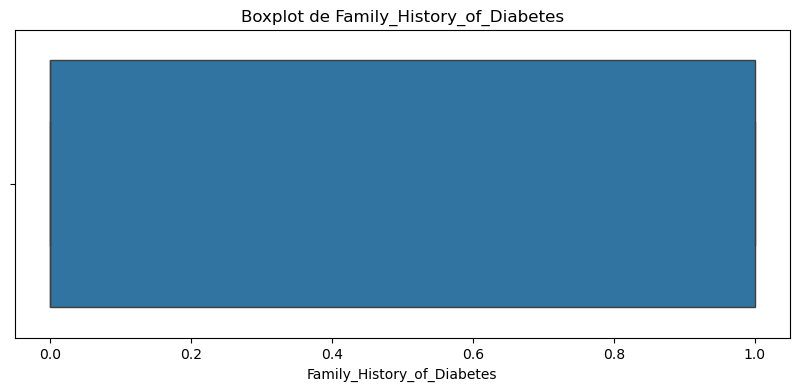

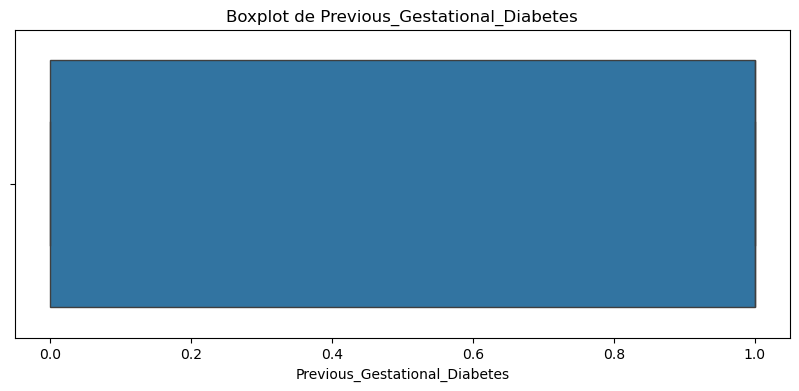

In [43]:
for colonne in numeric:
    plt.figure(figsize=(10, 4))  # Vous pouvez ajuster la taille du graphique selon vos besoins
    sns.boxplot(x=females[colonne])
    plt.title(f'Boxplot de {colonne}')
    plt.show()

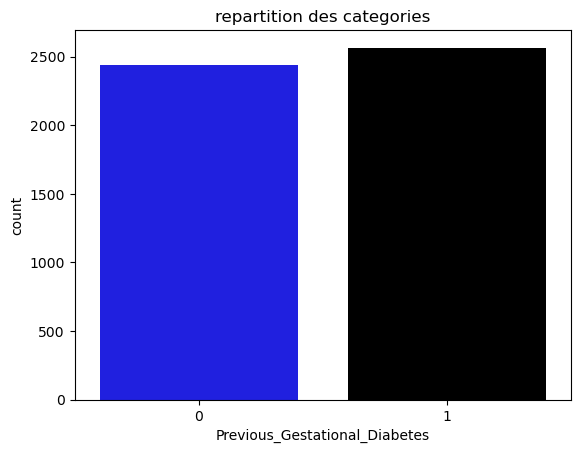

In [45]:
palette_colors =['blue','black']
#attribut class
sns.countplot(x='Previous_Gestational_Diabetes',data=females,palette=palette_colors)
plt.title('repartition des categories')
plt.show()
          

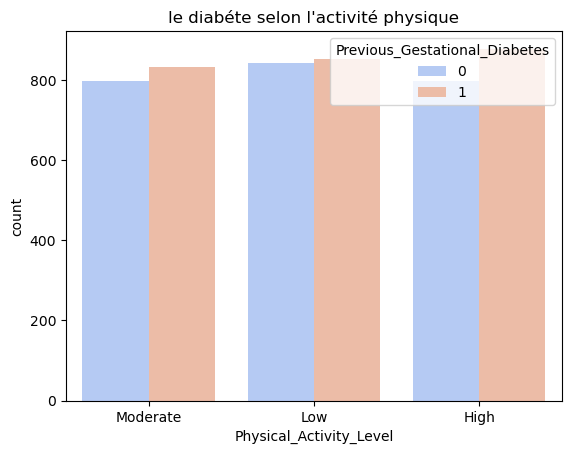

In [46]:
sns.countplot(x="Physical_Activity_Level", hue="Previous_Gestational_Diabetes", data=females, palette="coolwarm")
plt.title("le diabéte selon l'activité physique")
plt.show()

In [47]:
#modification apportées
females['Alcohol_Consumption'].fillna(females['Alcohol_Consumption'].mode()[0],inplace=True)
females.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5005 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     5005 non-null   int64  
 1   Age                            5005 non-null   int64  
 2   Sex                            5005 non-null   object 
 3   Ethnicity                      5005 non-null   object 
 4   BMI                            5005 non-null   float64
 5   Waist_Circumference            5005 non-null   float64
 6   Fasting_Blood_Glucose          5005 non-null   float64
 7   HbA1c                          5005 non-null   float64
 8   Blood_Pressure_Systolic        5005 non-null   int64  
 9   Blood_Pressure_Diastolic       5005 non-null   int64  
 10  Cholesterol_Total              5005 non-null   float64
 11  Cholesterol_HDL                5005 non-null   float64
 12  Cholesterol_LDL                5005 non-null   float6

In [48]:
#suppression des colonnes
colonne_supprimés =['Unnamed: 0','Cholesterol_LDL','Cholesterol_HDL','Waist_Circumference']
Females=females.drop(columns=colonne_supprimés)
print("\nDimensions du dataset :", Females.shape)
print(Females.head())


Dimensions du dataset : (5005, 17)
   Age     Sex Ethnicity   BMI  Fasting_Blood_Glucose  HbA1c  \
0   58  Female     White  35.8                  123.9   10.9   
2   34  Female     Black  25.0                  142.0   14.5   
4   27  Female     Asian  33.5                  146.4    7.1   
5   40  Female     Asian  33.6                   75.0   13.5   
7   38  Female  Hispanic  26.9                   80.2   10.9   

   Blood_Pressure_Systolic  Blood_Pressure_Diastolic  Cholesterol_Total   GGT  \
0                      152                       114              197.8  37.5   
2                      179                       104              261.0  56.2   
4                      122                        97              203.2  81.9   
5                      170                        90              152.3  77.5   
7                      121                        83              154.0  72.0   

   Serum_Urate Physical_Activity_Level  Dietary_Intake_Calories  \
0          7.2           

In [49]:
X = Females.drop('Previous_Gestational_Diabetes', axis=1)
y = Females['Previous_Gestational_Diabetes']
# Colonnes
numeric_features = ['Age', 'BMI','Fasting_Blood_Glucose','HbA1c','Blood_Pressure_Systolic','Blood_Pressure_Diastolic','Cholesterol_Total','Dietary_Intake_Calories']
categorical_features = ['Ethnicity', 'Sex', 'Physical_Activity_Level','Smoking_Status','Alcohol_Consumption','Family_History_of_Diabetes']
# Pipeline numérique
numeric_pipeline= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline catégoriel
categorial_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
#combinaison des pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_pipeline  , numeric_features ),
    ('cat',categorial_pipeline , categorical_features )
])



In [50]:
#pipeline finale avec regression
clf_pipeline = Pipeline(steps=[
   ('prep', preprocessor ),
   ('log', LogisticRegression(max_iter=1000))])
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI',
                                                   'Fasting_Blood_Glucose',
                                                   'HbA1c',
                                                   'Blood_Pressure_Systolic',
                                                   'Blood_Pressure_Diastolic',
                                                   'Cholesterol_Total',
                                                   'Dietary_Intake_Calories']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity', 'Sex',
                                                   'Physical_Activity_Level',
                                                   'Smoking_Status',
                                                   'Alcohol_Consumption',
                                                   'Family_History_of_Diabetes'])])),
                ('log', LogisticRegression(max_iter=1000))])

In [101]:
# Score
print("Score sur test :", clf_pipeline.score(X_test, y_test))
#enregistrement du modéle
joblib.dump(clf_pipeline, 'Diabétes_pipelines.joblib')
 #chargement du modéle
pipeline_loaded = joblib.load('Diabétes_pipelines.joblib')
# Test avec une ligne du jeu test
print("Prédiction :", pipeline_loaded.predict(X_test.iloc[:1]))
# 10. Prédiction
y_pred = pipeline_loaded.predict(X_test)
# 11. Évaluation du modèle
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))
print("\nExactitude (accuracy) :", accuracy_score(y_test, y_pred))


Score sur test : 0.5234765234765235
Prédiction : [1]

Matrice de confusion :
[[164 328]
 [149 360]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.52      0.33      0.41       492
           1       0.52      0.71      0.60       509

    accuracy                           0.52      1001
   macro avg       0.52      0.52      0.50      1001
weighted avg       0.52      0.52      0.51      1001


Exactitude (accuracy) : 0.5234765234765235


In [111]:
clf_pipeline = Pipeline(steps=[
   ('prep', preprocessor ),
    ('KNN',KNeighborsClassifier (n_neighbors=5))
    ])
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI',
                                                   'Fasting_Blood_Glucose',
                                                   'HbA1c',
                                                   'Blood_Pressure_Systolic',
                                                   'Blood_Pressure_Diastolic',
                                                   'Cholesterol_Total',
                                                   'Dietary_Intake_Calories']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity', 'Sex',
                                                   'Physical_Activity_Level',
                                                   'Smoking_Status',
                                                   'Alcohol_Consumption',
                                                   'Family_History_of_Diabetes'])])),
                ('KNN', KNeighborsClassifier())])

In [113]:

# Score
print("Score sur test :", clf_pipeline.score(X_test, y_test))
#enregistrement du modéle
joblib.dump(clf_pipeline, 'Dia_pipeline.joblib')
 #chargement du modéle
pipeline_loaded = joblib.load('Dia_pipeline.joblib')
# Test avec une ligne du jeu test
print("Prédiction :", pipeline_loaded.predict(X_test.iloc[:1]))
# 10. Prédiction
y_pred = pipeline_loaded.predict(X_test)
# 11. Évaluation du modèle
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))
print("\nExactitude (accuracy) :", accuracy_score(y_test, y_pred))

Score sur test : 0.4935064935064935
Prédiction : [1]

Matrice de confusion :
[[236 256]
 [251 258]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       492
           1       0.50      0.51      0.50       509

    accuracy                           0.49      1001
   macro avg       0.49      0.49      0.49      1001
weighted avg       0.49      0.49      0.49      1001


Exactitude (accuracy) : 0.4935064935064935


In [109]:
clf_pipeline = Pipeline(steps=[
   ('prep', preprocessor ),
   ('RF',RandomForestClassifier (n_estimators=100))])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI',
                                                   'Fasting_Blood_Glucose',
                                                   'HbA1c',
                                                   'Blood_Pressure_Systolic',
                                                   'Blood_Pressure_Diastolic',
                                                   'Cholesterol_Total',
                                                   'Dietary_Intake_Calories']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity', 'Sex',
                                                   'Physical_Activity_Level',
                                                   'Smoking_Status',
                                                   'Alcohol_Consumption',
                                                   'Family_History_of_Diabetes'])])),
                ('RF', RandomForestClassifier())])

In [107]:
# Score
print("Score sur test :", clf_pipeline.score(X_test, y_test))
#enregistrement du modéle
joblib.dump(clf_pipeline, 'Diabéts_pipeline.joblib')
 #chargement du modéle
pipeline_loaded = joblib.load('Diabéts_pipeline.joblib')
# Test avec une ligne du jeu test
print("Prédiction :", pipeline_loaded.predict(X_test.iloc[:1]))
# 10. Prédiction
y_pred = pipeline_loaded.predict(X_test)
# 11. Évaluation du modèle
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))
print("\nExactitude (accuracy) :", accuracy_score(y_test, y_pred))

Score sur test : 0.5104895104895105
Prédiction : [0]

Matrice de confusion :
[[242 250]
 [240 269]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       492
           1       0.52      0.53      0.52       509

    accuracy                           0.51      1001
   macro avg       0.51      0.51      0.51      1001
weighted avg       0.51      0.51      0.51      1001


Exactitude (accuracy) : 0.5104895104895105


In [164]:
#optimisation du pipeline 
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=4)
#selector_anova = SelectKBest(score_func=f_classif, k=8)

In [168]:
clf_pipeline = Pipeline(steps=[
    ('prep', preprocessor ),
    ('rf',rfe),
    ('log', model)])
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI',
                                                   'Fasting_Blood_Glucose',
                                                   'HbA1c',
                                                   'Blood_Pressure_Systolic',
                                                   'Blood_Pressure_Diastolic',
                                                   'Cholesterol_Total',
                                                   'Dietary_Intake_Calories']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity', 'Sex',
                                                   'Physical_Activity_Level',
                                                   'Smoking_Status',
                                                   'Alcohol_Consumption',
                                                   'Family_History_of_Diabetes'])])),
                ('rf',
                 RFE(estimator=LogisticRegression(max_iter=1000),
                     n_features_to_select=4)),
                ('log', LogisticRegression(max_iter=1000))])

In [180]:
y_pred = clf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nExactitude (accuracy) :", accuracy_score(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision  : {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.52      0.33      0.40       492
           1       0.52      0.70      0.60       509

    accuracy                           0.52      1001
   macro avg       0.52      0.52      0.50      1001
weighted avg       0.52      0.52      0.50      1001


Exactitude (accuracy) : 0.5184815184815185
Précision  : 0.52


NameError: name 'df' is not defined